In [ ]:
import json
import os
from collections import defaultdict
import pandas as pd

def load_json_files(file_paths):
    """Load and return data from multiple JSON files."""
    data = []
    for path in file_paths:
        try:
            with open(path, 'r', encoding='utf-8') as f:
                data.append(json.load(f))
        except FileNotFoundError:
            print(f"Warning: File not found - {path}")
        except json.JSONDecodeError:
            print(f"Warning: Invalid JSON in file - {path}")
    return data

def get_correct_question_type(result):
    """Extract the correct question type from question_id field."""
    question_id = result.get('question_id', '')
    if question_id.startswith('Matching_'):
        return 'Matching'
    else:
        # Fall back to the original question_type field for non-matching questions
        return result.get('question_type', 'Unknown')

def calculate_accuracy_by_criteria(results, criteria_key):
    """Calculate accuracy grouped by a specific criteria (subject or question_type)."""
    grouped = defaultdict(lambda: {'correct': 0, 'total': 0})
    
    for result in results:
        if criteria_key == 'question_type':
            criteria_value = get_correct_question_type(result)
        else:
            criteria_value = result.get(criteria_key, 'Unknown')
            
        grouped[criteria_value]['total'] += 1
        if result.get('is_correct', False):
            grouped[criteria_value]['correct'] += 1
    
    # Calculate accuracy percentages
    accuracy_dict = {}
    for criteria, counts in grouped.items():
        if counts['total'] > 0:
            accuracy_dict[criteria] = counts['correct'] / counts['total']
        else:
            accuracy_dict[criteria] = 0.0
    
    return accuracy_dict

def analyze_model_results(model_name, file_paths):
    """Analyze results for a single model across all runs."""
    print(f"\nAnalyzing {model_name}...")
    
    # Load all JSON files for this model
    all_runs_data = load_json_files(file_paths)
    
    if not all_runs_data:
        print(f"No valid data found for {model_name}")
        return None
    
    # Aggregate all results across runs
    all_results = []
    total_correct = 0
    total_questions = 0
    
    for run_data in all_runs_data:
        if 'results' in run_data:
            all_results.extend(run_data['results'])
            total_correct += run_data.get('correct_answers', 0)
            total_questions += run_data.get('total_questions', 0)
    
    # Calculate overall accuracy
    overall_accuracy = total_correct / total_questions if total_questions > 0 else 0
    
    # Calculate accuracy by subject
    subject_accuracy = calculate_accuracy_by_criteria(all_results, 'subject')
    
    # Calculate accuracy by question type (now using corrected logic)
    question_type_accuracy = calculate_accuracy_by_criteria(all_results, 'question_type')
    
    return {
        'model_name': model_name,
        'overall_accuracy': overall_accuracy,
        'subject_accuracy': subject_accuracy,
        'question_type_accuracy': question_type_accuracy,
        'total_questions': total_questions,
        'total_correct': total_correct,
        'num_runs': len(all_runs_data)
    }

models_config = {
    'Random': [
        r"random_baseline_evaluation_results\random_baseline_run_01_20250727_134825.json",
        r"random_baseline_evaluation_results\random_baseline_run_02_20250727_135553.json",
        r"random_baseline_evaluation_results\random_baseline_run_03_20250727_140325.json",
        r"random_baseline_evaluation_results\random_baseline_run_04_20250727_141050.json",
        r"random_baseline_evaluation_results\random_baseline_run_05_20250727_141815.json",
        r"random_baseline_evaluation_results\random_baseline_run_06_20250727_142552.json",
        r"random_baseline_evaluation_results\random_baseline_run_07_20250727_143329.json",
        r"random_baseline_evaluation_results\random_baseline_run_08_20250727_144053.json",
        r"random_baseline_evaluation_results\random_baseline_run_09_20250727_144825.json",
        r"random_baseline_evaluation_results\random_baseline_run_10_20250727_145556.json"
    ],
    'Gemini 2.5 Pro': [
        r"gemini25_evaluation_results\gemini25_run_01_20250720_002309.json",
        r"gemini25_evaluation_results\gemini25_run_02_20250721_113452.json",
        r"gemini25_evaluation_results\gemini25_run_03_20250723_020027.json",
        r"gemini25_evaluation_results\gemini25_run_04_20250724_202554.json",
        r"gemini25_evaluation_results\gemini25_run_05_20250726_085227.json",
        r"gemini25_evaluation_results\gemini25_run_06_partial_20250727_151734.json"
    ],
    'o3': [
        r"o3_evaluation_results\o3_run_01_20250729_011550.json",
        r"o3_evaluation_results\o3_run_02_partial_20250729_020633.json"
    ],
    'Gemma 3 27B': [
        r"gemma3_evaluation_results\gemma3_run_01_20250707_234351.json",
        r"gemma3_evaluation_results\gemma3_run_02_20250708_014953.json",
        r"gemma3_evaluation_results\gemma3_run_03_20250708_035306.json",
        r"gemma3_evaluation_results\gemma3_run_04_20250708_055248.json",
        r"gemma3_evaluation_results\gemma3_run_05_20250708_120515.json",
        r"gemma3_evaluation_results\gemma3_run_06_20250708_140819.json",
        r"gemma3_evaluation_results\gemma3_run_07_20250708_160511.json",
        r"gemma3_evaluation_results\gemma3_run_08_20250708_180325.json",
        r"gemma3_evaluation_results\gemma3_run_09_20250708_195703.json",
        r"gemma3_evaluation_results\gemma3_run_10_20250708_215928.json"
    ],
    'InternVL3 8B': [
        r"internvl3_8b_evaluation_results\internvl3_8b_run_01_20250722_141020.json",
        r"internvl3_8b_evaluation_results\internvl3_8b_run_02_20250723_071016.json",
        r"internvl3_8b_evaluation_results\internvl3_8b_run_03_20250723_161028.json",
        r"internvl3_8b_evaluation_results\internvl3_8b_run_04_20250724_060014.json",
        r"internvl3_8b_evaluation_results\internvl3_8b_run_05_20250724_221557.json",
        r"internvl3_8b_evaluation_results\internvl3_8b_run_06_20250725_201612.json",
        r"internvl3_8b_evaluation_results\internvl3_8b_run_07_20250726_132420.json",
        r"internvl3_8b_evaluation_results\internvl3_8b_run_08_20250727_123035.json",
        r"internvl3_8b_evaluation_results\internvl3_8b_run_09_20250727_182745.json",
        r"internvl3_8b_evaluation_results\internvl3_8b_run_10_20250728_020122.json"
    ],
    'Qwen 2.5 VL 7B': [
        r"qwen25_evaluation_results\qwen25_run_01_20250719_181016.json",
        r"qwen25_evaluation_results\qwen25_run_02_20250719_214508.json",
        r"qwen25_evaluation_results\qwen25_run_03_20250720_034956.json",
        r"qwen25_evaluation_results\qwen25_run_04_20250720_092106.json",
        r"qwen25_evaluation_results\qwen25_run_05_20250720_124622.json",
        r"qwen25_evaluation_results\qwen25_run_06_20250720_172609.json",
        r"qwen25_evaluation_results\qwen25_run_07_20250720_204204.json",
        r"qwen25_evaluation_results\qwen25_run_08_20250720_235805.json",
        r"qwen25_evaluation_results\qwen25_run_09_20250721_041235.json",
        r"qwen25_evaluation_results\qwen25_run_10_20250721_072354.json"
    ]
}

# Analyze all models
all_results = []

for model_name, file_paths in models_config.items():
    result = analyze_model_results(model_name, file_paths)
    if result:
        all_results.append(result)

# Create comprehensive results table
print("\n" + "="*80)
print("COMPREHENSIVE RESULTS SUMMARY")
print("="*80)

# Prepare data for tabular display
subjects = ['Chemistry', 'Physics', 'Mathematics']
question_types = ['MCQ-Single', 'MCQ-Multiple', 'Numerical', 'Matching']

# Create DataFrame for better formatting
summary_data = []

for result in all_results:
    row = {
        'Model': result['model_name'],
        'Total': f"{result['overall_accuracy']:.3f}",
        'Runs': result['num_runs'],
        'Questions': result['total_questions']
    }
    
    # Add subject accuracies
    for subject in subjects:
        accuracy = result['subject_accuracy'].get(subject, 0)
        row[subject] = f"{accuracy:.3f}"
    
    # Add question type accuracies
    for qtype in question_types:
        accuracy = result['question_type_accuracy'].get(qtype, 0)
        row[qtype] = f"{accuracy:.3f}"
    
    summary_data.append(row)

# Create and display DataFrame
df = pd.DataFrame(summary_data)

# Reorder columns for better readability
column_order = ['Model', 'Total', 'Runs', 'Questions'] + subjects + question_types
df = df.reindex(columns=column_order)

print(df.to_string(index=False))

# Detailed breakdown for each model
print("\n" + "="*80)
print("DETAILED BREAKDOWN BY MODEL")
print("="*80)

for result in all_results:
    print(f"\n{result['model_name']}:")
    print(f"  Overall Accuracy: {result['overall_accuracy']:.3f} ({result['total_correct']}/{result['total_questions']})")
    print(f"  Number of Runs: {result['num_runs']}")
    
    print(f"  Subject Breakdown:")
    for subject in subjects:
        accuracy = result['subject_accuracy'].get(subject, 0)
        print(f"    {subject}: {accuracy:.3f}")
    
    print(f"  Question Type Breakdown:")
    for qtype in question_types:
        accuracy = result['question_type_accuracy'].get(qtype, 0)
        print(f"    {qtype}: {accuracy:.3f}")

# Save results to CSV
df.to_csv('model_evaluation_results.csv', index=False)
print(f"\nResults saved to 'model_evaluation_results.csv'")

# Debug: Print question type distribution for verification
print("\n" + "="*80)
print("QUESTION TYPE DISTRIBUTION (for verification)")
print("="*80)

for result in all_results:
    print(f"\n{result['model_name']}:")
    for qtype, accuracy in result['question_type_accuracy'].items():
        # Count questions of this type
        count = 0
        all_runs_data = load_json_files(models_config[result['model_name']])
        for run_data in all_runs_data:
            if 'results' in run_data:
                for res in run_data['results']:
                    if qtype == 'Matching':
                        if res.get('question_id', '').startswith('Matching_'):
                            count += 1
                    else:
                        if res.get('question_type', '') == qtype:
                            count += 1
        print(f"    {qtype}: {count} questions, accuracy: {accuracy:.3f}")

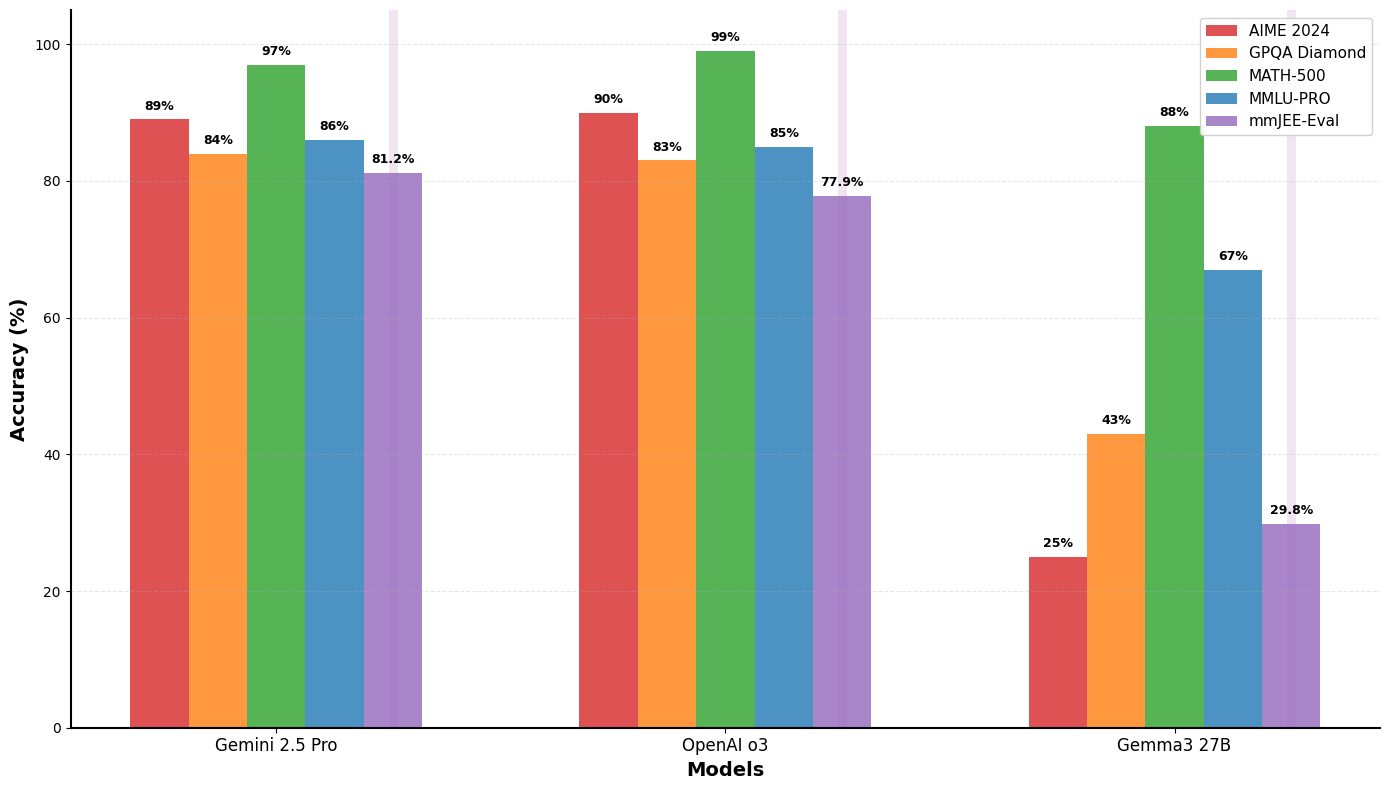


BENCHMARK PERFORMANCE SUMMARY
Benchmark       MMLU-PRO  GPQA Diamond  MATH-500  AIME 2024  mmJEE-Eval
Model                                                                  
Gemini 2.5 Pro      86.0          84.0      97.0       89.0       81.16
Gemma3 27B          67.0          43.0      88.0       25.0       29.80
OpenAI o3           85.0          83.0      99.0       90.0       77.86

BENCHMARK DIFFICULTY ANALYSIS
Benchmark       Avg      Std      Range    Difficulty  
------------------------------------------------------------
mmJEE-Eval      62.9     23.5     51.4     Hard        
AIME 2024       68.0     30.4     65.0     Hard        
GPQA Diamond    70.0     19.1     41.0     Medium      
MMLU-PRO        79.3     8.7      19.0     Medium      
MATH-500        94.7     4.8      11.0     Easy        

mmJEE-Eval ranks as the #1 most difficult benchmark (by average score)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set up the data
benchmark_data = {
    'Gemini 2.5 Pro': {
        'MMLU-PRO': 86,
        'GPQA Diamond': 84,
        'MATH-500': 97,
        'AIME 2024': 89,
        'mmJEE-Eval': 81.16,
        #'Humaneval': None  # Not provided
    },
    'OpenAI o3': {
        'MMLU-PRO': 85,
        'GPQA Diamond': 83,
        #'Humaneval': 99,
        'MATH-500': 99,
        'AIME 2024': 90,
        'mmJEE-Eval': 77.86
    },
    'Gemma3 27B': {
        'MMLU-PRO': 67,
        'GPQA Diamond': 43,
        #'Humaneval': 89,
        'MATH-500': 88,
        'AIME 2024': 25,
        'mmJEE-Eval': 29.8
    }
}

# Create the visualization - focus on benchmark comparison
plt.style.use('default')
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Get all unique benchmarks and models
all_benchmarks = set()
for model_benchmarks in benchmark_data.values():
    all_benchmarks.update(model_benchmarks.keys())
all_benchmarks = [b for b in all_benchmarks if b != 'Humaneval' or any(benchmark_data[m].get('Humaneval') for m in benchmark_data)]
all_benchmarks = sorted(all_benchmarks)

models = list(benchmark_data.keys())

# Colors for each benchmark - using distinct colors
benchmark_colors = {
    'MMLU-PRO': '#1f77b4',        # Blue
    'GPQA Diamond': '#ff7f0e',    # Orange  
    'MATH-500': '#2ca02c',        # Green
    'AIME 2024': '#d62728',       # Red
    'mmJEE-Eval': '#9467bd',      # Purple
    'Humaneval': '#8c564b'        # Brown
}

x = np.arange(len(models))
width = 0.13  # Width of bars (6 benchmarks, so narrower bars)

# Plot bars for each benchmark
for i, benchmark in enumerate(all_benchmarks):
    scores = []
    for model in models:
        score = benchmark_data[model].get(benchmark)
        scores.append(score if score is not None else 0)
    
    # Calculate offset for this benchmark
    offset = (i - len(all_benchmarks)/2 + 0.5) * width
    
    bars = ax.bar(x + offset, scores, width, label=benchmark, 
                 color=benchmark_colors[benchmark], alpha=0.8)
    
    # Add value labels on bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            # Adjust label position for better readability
            label_y = height + 1
            ax.text(bar.get_x() + bar.get_width()/2., label_y,
                   f'{height:.1f}%' if height != int(height) else f'{int(height)}%',
                   ha='center', va='bottom', fontsize=9, fontweight='bold',
                   rotation=0 if height < 50 else 0)

# Customize the chart
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
#ax.set_title('Benchmark Performance Comparison Across Models', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=11, loc='upper right', framealpha=0.9)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 105)

# Add some styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Highlight mmJEE-Eval with a subtle background
mmjee_positions = []
for i, benchmark in enumerate(all_benchmarks):
    if benchmark == 'mmJEE-Eval':
        offset = (i - len(all_benchmarks)/2 + 0.5) * width
        for j, model in enumerate(models):
            mmjee_positions.append(x[j] + offset)

# Add a subtle highlight for mmJEE-Eval bars
for pos in mmjee_positions:
    ax.axvline(x=pos, color='purple', alpha=0.1, linewidth=width*50, zorder=0)

plt.tight_layout()

# Save as PDF
plt.savefig('benchmark_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Create a summary table for reference
print("\n" + "="*80)
print("BENCHMARK PERFORMANCE SUMMARY")
print("="*80)

# Create DataFrame for easier viewing
df_data = []
for model, benchmarks in benchmark_data.items():
    for benchmark, score in benchmarks.items():
        if score is not None:
            df_data.append({'Model': model, 'Benchmark': benchmark, 'Score': score})

df = pd.DataFrame(df_data)
summary_df = df.pivot(index='Model', columns='Benchmark', values='Score')

# Reorder columns for logical grouping
column_order = ['MMLU-PRO', 'GPQA Diamond', 'MATH-500', 'AIME 2024', 'Humaneval', 'mmJEE-Eval']
available_columns = [col for col in column_order if col in summary_df.columns]
summary_df = summary_df[available_columns]

# Fill NaN with dash for missing values
summary_df = summary_df.fillna('-')

print(summary_df.to_string())

# Analysis of benchmark difficulty (based on average scores)
print("\n" + "="*60)
print("BENCHMARK DIFFICULTY ANALYSIS")
print("="*60)

benchmark_stats = []
for benchmark in available_columns:
    scores = df[df['Benchmark'] == benchmark]['Score'].values
    if len(scores) > 0:
        avg_score = np.mean(scores)
        std_score = np.std(scores)
        min_score = np.min(scores)
        max_score = np.max(scores)
        benchmark_stats.append({
            'Benchmark': benchmark,
            'Avg': avg_score,
            'Std': std_score,
            'Min': min_score,
            'Max': max_score,
            'Range': max_score - min_score
        })

benchmark_stats.sort(key=lambda x: x['Avg'])

print(f"{'Benchmark':<15} {'Avg':<8} {'Std':<8} {'Range':<8} {'Difficulty':<12}")
print("-" * 60)
for i, stats in enumerate(benchmark_stats):
    difficulty = "Very Hard" if stats['Avg'] < 50 else "Hard" if stats['Avg'] < 70 else "Medium" if stats['Avg'] < 85 else "Easy"
    print(f"{stats['Benchmark']:<15} {stats['Avg']:<8.1f} {stats['Std']:<8.1f} {stats['Range']:<8.1f} {difficulty:<12}")

print(f"\nmmJEE-Eval ranks as the {'#' + str([s['Benchmark'] for s in benchmark_stats].index('mmJEE-Eval') + 1)} most difficult benchmark (by average score)")

## Random Baseline Evaluation

In [ ]:
import pandas as pd
import json
import time
import os
import asyncio
import aiofiles
from pathlib import Path
import signal
import sys
from datetime import datetime
import re
import numpy as np
from scipy import stats
from collections import defaultdict
import random
from typing import List, Dict, Optional, Tuple
import logging
import pickle
from dataclasses import dataclass, asdict

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('jee_random_baseline_evaluation.log', encoding='utf-8'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

@dataclass
class EvaluationState:
    """Persistent state for resuming evaluation"""
    current_run: int
    current_question_idx: int
    completed_questions: int
    total_questions: int
    current_run_results: List[Dict]
    all_run_summaries: List[Dict]
    failed_questions: List[Dict]  # Keep for consistency, should be empty for random baseline
    start_time: float
    last_save_time: float

class RandomBaselineGenerator:
    """Random answer generator that follows question type patterns"""
    
    def __init__(self, random_seed: int = None):
        if random_seed is not None:
            random.seed(random_seed)
            np.random.seed(random_seed)
        
        # Define answer choices for different question types
        self.mcq_choices = ['A', 'B', 'C', 'D']
        
        logger.info("Random baseline generator initialized")
    
    async def generate_random_answer(self, question_type: str, question_id: str) -> str:
        """Generate random answer based on question type"""
        # Add small delay to simulate processing time (0.1-0.5 seconds)
        await asyncio.sleep(random.uniform(0.1, 0.5))
        
        if question_type == "MCQ-Single":
            # Single choice from A, B, C, D
            return random.choice(self.mcq_choices)
        
        elif question_type == "MCQ-Multiple":
            # Multiple choices: 1-4 options randomly selected
            num_choices = random.randint(1, 4)
            selected = random.sample(self.mcq_choices, num_choices)
            return ''.join(sorted(selected))
        
        elif question_type == "Numerical":
            # Random numerical answer between 0-999 with occasional decimals
            if random.random() < 0.3:  # 30% chance of decimal
                return str(round(random.uniform(0, 100), 2))
            else:
                return str(random.randint(0, 999))
        
        elif question_type == "Matching":
            # Single choice for matching questions
            return random.choice(self.mcq_choices)
        
        else:
            # Fallback to single MCQ choice
            logger.warning(f"Unknown question type: {question_type}, defaulting to MCQ-Single")
            return random.choice(self.mcq_choices)

class JEERandomBaselineEvaluator:
    def __init__(self, base_path: str, num_runs: int = 10, random_seed: int = None):
        self.base_path = Path(base_path)
        self.num_runs = num_runs
        self.save_frequency = 50  # Save every 50 questions for fast random baseline
        self.model_name = "random_baseline"
        self.random_seed = random_seed
        
        # Load dataset
        self.csv_path = self.base_path / "jee_advanced_combined_fixed.csv"
        self.df = pd.read_csv(self.csv_path)
        
        logger.info(f"Loaded dataset with {len(self.df)} questions")
        
        # Initialize random generator
        self.generator = RandomBaselineGenerator(random_seed)
        
        # Results and state management
        self.results_dir = self.base_path / "random_baseline_evaluation_results"
        self.results_dir.mkdir(exist_ok=True)
        
        self.state_file = self.results_dir / "evaluation_state.pkl"
        self.state = self.load_or_create_state()
        
        # Control flags
        self.stop_requested = False
        self.interrupted = False
        
        logger.info(f"Results will be saved to: {self.results_dir}")
        logger.info(f"Running {num_runs} evaluations with random baseline")
        logger.info(f"Random seed: {random_seed}")
        logger.info(f"Saving progress every {self.save_frequency} questions")
    
    def load_or_create_state(self) -> EvaluationState:
        """Load existing state or create new one"""
        if self.state_file.exists():
            try:
                with open(self.state_file, 'rb') as f:
                    state = pickle.load(f)
                logger.info(f"Resumed from Run {state.current_run}, Question {state.current_question_idx}/{len(self.df)}")
                logger.info(f"Current run has {len(state.current_run_results)} completed questions")
                return state
            except Exception as e:
                logger.error(f"Error loading state: {e}")
        
        # Create new state
        return EvaluationState(
            current_run=1,
            current_question_idx=0,
            completed_questions=0,
            total_questions=len(self.df) * self.num_runs,
            current_run_results=[],
            all_run_summaries=[],
            failed_questions=[],
            start_time=time.time(),
            last_save_time=time.time()
        )
    
    async def save_state(self, force: bool = False):
        """Save current evaluation state"""
        if not force and time.time() - self.state.last_save_time < 30:
            return
            
        self.state.last_save_time = time.time()
        try:
            temp_file = self.state_file.with_suffix('.tmp')
            with open(temp_file, 'wb') as f:
                pickle.dump(self.state, f)
            temp_file.replace(self.state_file)
            
            logger.info(f"State saved: Run {self.state.current_run}, Q{self.state.current_question_idx}/{len(self.df)}, {len(self.state.current_run_results)} results")
        except Exception as e:
            logger.error(f"Error saving state: {e}")
    
    def convert_to_json_serializable(self, obj):
        """Convert numpy/pandas types to JSON serializable types"""
        if isinstance(obj, dict):
            return {key: self.convert_to_json_serializable(value) for key, value in obj.items()}
        elif isinstance(obj, list):
            return [self.convert_to_json_serializable(item) for item in obj]
        elif hasattr(obj, 'item'):
            return obj.item()
        elif hasattr(obj, 'tolist'):
            return obj.tolist()
        elif pd.isna(obj):
            return None
        else:
            return obj
    
    async def save_partial_run_results(self):
        """Save current run results as backup"""
        if not self.state.current_run_results:
            return
            
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"random_baseline_run_{self.state.current_run:02d}_partial_{timestamp}.json"
        filepath = self.results_dir / filename
        
        partial_summary = {
            'run_id': self.state.current_run,
            'model': self.model_name,
            'random_seed': self.random_seed,
            'status': 'partial',
            'completed_questions': len(self.state.current_run_results),
            'total_planned': len(self.df),
            'timestamp': timestamp,
            'results': self.state.current_run_results
        }
        
        serializable_summary = self.convert_to_json_serializable(partial_summary)
        
        async with aiofiles.open(filepath, 'w', encoding='utf-8') as f:
            await f.write(json.dumps(serializable_summary, indent=2))
        
        logger.info(f"Partial results saved: {filename}")
    
    def is_answer_correct(self, predicted_answer: str, question_data: pd.Series) -> bool:
        """Check if predicted answer is correct"""
        try:
            predicted = str(predicted_answer).strip().upper()
            question_type = question_data['question_type']
            
            # Handle numerical questions with acceptable values
            if question_type == "Numerical" and question_data['expanded_answer']:
                try:
                    acceptable_values = eval(question_data['acceptable_values'])
                    pred_num = float(predicted)
                    return pred_num in acceptable_values
                except (ValueError, SyntaxError):
                    pass
            
            correct = str(question_data['answer']).strip().upper()
            
            if question_type == "MCQ-Single" or question_type == "Matching":
                return predicted == correct
            elif question_type == "MCQ-Multiple":
                pred_letters = set(re.findall(r'[ABCD]', predicted))
                correct_letters = set(re.findall(r'[ABCD]', correct))
                return pred_letters == correct_letters
            elif question_type == "Numerical":
                if predicted == correct:
                    return True
                try:
                    pred_num = float(predicted)
                    correct_num = float(correct)
                    tolerance = abs(correct_num) * 0.01 if abs(correct_num) > 1 else 0.01
                    return abs(pred_num - correct_num) <= tolerance
                except ValueError:
                    return predicted == correct
            
            return predicted == correct
        except Exception as e:
            logger.error(f"Error comparing answers: {e}")
            return False
    
    async def evaluate_single_question(self, question_data: pd.Series, run_id: int, question_idx: int) -> Dict:
        """Evaluate a single question using random baseline"""
        try:
            start_time = time.time()
            
            # Generate random answer
            predicted_answer = await self.generator.generate_random_answer(
                question_data['question_type'], 
                question_data['question_id']
            )
            
            inference_time = time.time() - start_time
            
            # Check correctness
            is_correct = self.is_answer_correct(predicted_answer, question_data)
            
            # Log progress occasionally
            if (question_idx + 1) % 100 == 0:
                status = "[OK]" if is_correct else "[FAIL]"
                logger.info(f"Run {run_id} | Q{question_idx+1}: {status} ({inference_time:.3f}s) | {question_data['subject']} | {question_data['question_type']}")
            
            return {
                'run_id': run_id,
                'question_idx': question_idx,
                'question_id': str(question_data['question_id']),
                'year': int(question_data['year']),
                'paper': str(question_data['paper']),
                'language': str(question_data['language']),
                'subject': str(question_data['subject']),
                'question_type': str(question_data['question_type']),
                'correct_answer': str(question_data['answer']),
                'predicted_answer': predicted_answer,
                'is_correct': bool(is_correct),
                'inference_time': float(inference_time),
                'full_response': f"Random answer: {predicted_answer}",
                'image_filename': str(question_data['image_filename']),
                'model': self.model_name,
                'random_seed': self.random_seed
            }
        except Exception as e:
            logger.error(f"Error evaluating question {question_data.get('question_id', 'unknown')}: {e}")
            # Return a failed result instead of None
            return {
                'run_id': run_id,
                'question_idx': question_idx,
                'question_id': str(question_data.get('question_id', 'unknown')),
                'year': int(question_data.get('year', 0)),
                'paper': str(question_data.get('paper', '')),
                'language': str(question_data.get('language', '')),
                'subject': str(question_data.get('subject', '')),
                'question_type': str(question_data.get('question_type', '')),
                'correct_answer': str(question_data.get('answer', '')),
                'predicted_answer': 'ERROR',
                'is_correct': False,
                'inference_time': 0.0,
                'full_response': f"Error: {str(e)}",
                'image_filename': str(question_data.get('image_filename', '')),
                'model': self.model_name,
                'random_seed': self.random_seed
            }
    
    async def run_single_evaluation_run(self, run_id: int) -> Optional[Dict]:
        """Run a single evaluation run with frequent saving"""
        logger.info(f"\n{'='*60}")
        logger.info(f"Starting Random Baseline Run {run_id}/{self.num_runs}")
        logger.info(f"Random seed: {self.random_seed}")
        logger.info(f"{'='*60}")
        
        # Set per-run random seed for reproducibility
        if self.random_seed is not None:
            run_random_seed = self.random_seed + run_id
            random.seed(run_random_seed)
            np.random.seed(run_random_seed)
        
        # Shuffle questions for this run
        shuffled_df = self.df.sample(frac=1, random_state=run_id + (self.random_seed or 0)).reset_index(drop=True)
        
        # If resuming, skip already completed questions
        start_idx = self.state.current_question_idx if run_id == self.state.current_run else 0
        
        run_start_time = time.time()
        
        # Process questions sequentially with frequent saving
        for question_idx in range(start_idx, len(shuffled_df)):
            if self.stop_requested:
                break
                
            question_data = shuffled_df.iloc[question_idx]
            
            result = await self.evaluate_single_question(question_data, run_id, question_idx)
            
            if result:
                self.state.current_run_results.append(result)
                self.state.completed_questions += 1
            
            # Update state
            self.state.current_question_idx = question_idx + 1
            
            # Save frequently
            if (question_idx + 1) % self.save_frequency == 0:
                await self.save_state()
                await self.save_partial_run_results()
                
                # Calculate current accuracy
                if self.state.current_run_results:
                    current_correct = sum(1 for r in self.state.current_run_results if r['is_correct'])
                    current_accuracy = (current_correct / len(self.state.current_run_results)) * 100
                    
                    logger.info(f"💾 Progress saved at Q{question_idx + 1}/{len(shuffled_df)} | "
                              f"Current accuracy: {current_accuracy:.1f}%")
        
        run_duration = time.time() - run_start_time
        
        if not self.state.current_run_results:
            logger.error(f"No valid results for run {run_id}")
            return None
        
        # Calculate accuracy
        correct_count = sum(1 for r in self.state.current_run_results if r['is_correct'])
        accuracy = (correct_count / len(self.state.current_run_results)) * 100
        
        # Create run summary
        run_summary = {
            'run_id': run_id,
            'model': self.model_name,
            'random_seed': self.random_seed,
            'run_random_seed': run_id + (self.random_seed or 0),
            'total_questions': len(self.state.current_run_results),
            'correct_answers': correct_count,
            'accuracy': accuracy,
            'duration': run_duration,
            'avg_time_per_question': run_duration / len(self.state.current_run_results),
            'failed_questions': 0,  # Should be 0 for random baseline
            'timestamp': datetime.now().strftime("%Y%m%d_%H%M%S"),
            'results': self.state.current_run_results
        }
        
        logger.info(f"Run {run_id} completed: {accuracy:.2f}% accuracy ({correct_count}/{len(self.state.current_run_results)}) in {run_duration:.1f}s")
        logger.info(f"Average time per question: {run_summary['avg_time_per_question']:.3f}s")
        
        return run_summary
    
    async def save_run_results(self, run_summary: Dict):
        """Save results for a single run"""
        timestamp = run_summary['timestamp']
        filename = f"random_baseline_run_{run_summary['run_id']:02d}_{timestamp}.json"
        filepath = self.results_dir / filename
        
        serializable_summary = self.convert_to_json_serializable(run_summary)
        
        async with aiofiles.open(filepath, 'w', encoding='utf-8') as f:
            await f.write(json.dumps(serializable_summary, indent=2))
        
        logger.info(f"Run {run_summary['run_id']} results saved to: {filename}")
    
    def calculate_statistics(self, all_run_summaries: List[Dict]) -> Dict:
        """Calculate overall statistics across all runs"""
        accuracies = [summary['accuracy'] for summary in all_run_summaries]
        
        return {
            'num_runs': len(accuracies),
            'mean_accuracy': np.mean(accuracies),
            'std_accuracy': np.std(accuracies, ddof=1),
            'sem_accuracy': stats.sem(accuracies),
            'min_accuracy': np.min(accuracies),
            'max_accuracy': np.max(accuracies),
            'confidence_interval_95': stats.t.interval(
                0.95, len(accuracies) - 1,
                loc=np.mean(accuracies),
                scale=stats.sem(accuracies)
            ) if len(accuracies) > 1 else (np.mean(accuracies), np.mean(accuracies)),
            'individual_accuracies': accuracies
        }
    
    async def run_evaluation(self):
        """Run complete evaluation with resume capability and frequent saves"""
        logger.info("Starting JEE Random Baseline Evaluation")
        logger.info(f"Dataset: {len(self.df)} questions")
        logger.info(f"Model: {self.model_name}")
        logger.info(f"Random seed: {self.random_seed}")
        logger.info(f"Total runs planned: {self.num_runs}")
        logger.info(f"Save frequency: every {self.save_frequency} questions")
        
        try:
            # Resume from where we left off
            for run_id in range(self.state.current_run, self.num_runs + 1):
                if self.stop_requested:
                    break
                
                # Reset current run state if starting new run
                if run_id != self.state.current_run:
                    self.state.current_run_results = []
                    self.state.current_question_idx = 0
                
                # Run single evaluation
                run_summary = await self.run_single_evaluation_run(run_id)
                
                if run_summary:
                    # Save run results
                    await self.save_run_results(run_summary)
                    
                    # Update state for next run
                    self.state.all_run_summaries.append(run_summary)
                    self.state.current_run = run_id + 1
                    self.state.current_question_idx = 0
                    self.state.current_run_results = []
                    
                    # Save state after each run
                    await self.save_state(force=True)
                    
                    # Print progress
                    progress = (run_id / self.num_runs) * 100
                    elapsed = time.time() - self.state.start_time
                    eta = (elapsed / run_id) * (self.num_runs - run_id) if run_id > 0 else 0
                    
                    avg_accuracy = np.mean([s['accuracy'] for s in self.state.all_run_summaries])
                    
                    logger.info(f"Progress: {progress:.1f}% | ETA: {eta/3600:.2f}h | "
                              f"Avg accuracy: {avg_accuracy:.3f}%")
        
        except KeyboardInterrupt:
            logger.info("Evaluation interrupted by user")
            self.interrupted = True
        except Exception as e:
            logger.error(f"Error during evaluation: {e}")
        finally:
            # Always save final state
            await self.save_state(force=True)
            
            # Save any remaining partial results
            if self.state.current_run_results:
                await self.save_partial_run_results()
            
            # Generate final report if we have results
            if self.state.all_run_summaries:
                await self.generate_final_report()
        
        logger.info("Random baseline evaluation session ended!")
    
    async def generate_final_report(self):
        """Generate comprehensive final report"""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        report_file = self.results_dir / f"random_baseline_final_report_{timestamp}.txt"
        
        stats = self.calculate_statistics(self.state.all_run_summaries)
        
        # Collect all results for detailed analysis
        all_results = []
        for summary in self.state.all_run_summaries:
            all_results.extend(summary['results'])
        
        # Calculate expected random accuracy for different question types
        question_type_stats = defaultdict(lambda: {'correct': 0, 'total': 0})
        for result in all_results:
            qtype = result['question_type']
            question_type_stats[qtype]['total'] += 1
            if result['is_correct']:
                question_type_stats[qtype]['correct'] += 1
        
        report_content = f"""JEE Advanced Random Baseline Evaluation Report
{'='*80}

Evaluation Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Model: {self.model_name}
Random Seed: {self.random_seed}
Dataset: {len(self.df)} questions
Completed Runs: {len(self.state.all_run_summaries)}/{self.num_runs}
Save Frequency: Every {self.save_frequency} questions

PERFORMANCE SUMMARY
{'-'*40}
Mean Accuracy: {stats['mean_accuracy']:.3f}% ± {stats['std_accuracy']:.3f}%
Standard Error: {stats['sem_accuracy']:.3f}%
95% Confidence Interval: [{stats['confidence_interval_95'][0]:.3f}%, {stats['confidence_interval_95'][1]:.3f}%]
Range: {stats['min_accuracy']:.3f}% - {stats['max_accuracy']:.3f}%

THEORETICAL vs OBSERVED RANDOM PERFORMANCE
{'-'*40}
Expected accuracies for pure random guessing:
- MCQ-Single: 25.0% (1/4 choices)
- MCQ-Multiple: varies (depends on correct answer length)
- Numerical: ~0% (infinite possibilities)
- Matching: 25.0% (1/4 choices)

Observed accuracies by question type:
"""
        
        # Performance by category
        categories = ['language', 'subject', 'question_type', 'year']
        for category in categories:
            report_content += f"\nBy {category.title()}:\n"
            category_stats = defaultdict(lambda: {'correct': 0, 'total': 0})
            
            for result in all_results:
                cat_value = result[category]
                category_stats[cat_value]['total'] += 1
                if result['is_correct']:
                    category_stats[cat_value]['correct'] += 1
            
            for cat_value, stats_dict in sorted(category_stats.items()):
                accuracy = (stats_dict['correct'] / stats_dict['total']) * 100
                
                # Add theoretical expectation for question types
                if category == 'question_type':
                    if cat_value in ['MCQ-Single', 'Matching']:
                        theoretical = 25.0
                        diff = accuracy - theoretical
                        report_content += f"  {cat_value}: {accuracy:.3f}% ({stats_dict['correct']}/{stats_dict['total']}) [Expected: {theoretical:.1f}%, Diff: {diff:+.2f}%]\n"
                    else:
                        report_content += f"  {cat_value}: {accuracy:.3f}% ({stats_dict['correct']}/{stats_dict['total']})\n"
                else:
                    report_content += f"  {cat_value}: {accuracy:.3f}% ({stats_dict['correct']}/{stats_dict['total']})\n"
        
        # Individual run accuracies
        report_content += f"\nINDIVIDUAL RUN ACCURACIES\n{'-'*40}\n"
        for i, summary in enumerate(self.state.all_run_summaries, 1):
            run_seed = summary.get('run_random_seed', 'unknown')
            report_content += f"Run {i:2d}: {summary['accuracy']:6.3f}% ({summary['correct_answers']:4d}/{summary['total_questions']:4d}) [Seed: {run_seed}]\n"
        
        # Runtime statistics
        total_runtime = time.time() - self.state.start_time
        total_questions_completed = sum(len(summary['results']) for summary in self.state.all_run_summaries)
        
        avg_time = np.mean([result['inference_time'] for result in all_results])
        
        report_content += f"\nRUNTIME STATISTICS\n{'-'*40}\n"
        report_content += f"Total Runtime: {total_runtime:.2f} seconds ({total_runtime/60:.2f} minutes)\n"
        report_content += f"Questions Completed: {total_questions_completed:,}\n"
        report_content += f"Average Time per Question: {avg_time:.4f}s\n"
        report_content += f"Questions per Second: {total_questions_completed/total_runtime:.1f}\n"
        report_content += f"Questions per Hour: {total_questions_completed/(total_runtime/3600):.0f}\n"
        
        # Random baseline info
        report_content += f"\nRANDOM BASELINE CONFIGURATION\n{'-'*40}\n"
        report_content += f"Model: {self.model_name}\n"
        report_content += f"Global Random Seed: {self.random_seed}\n"
        report_content += f"Per-run Seeds: Global_seed + run_id\n"
        report_content += f"Answer Generation:\n"
        report_content += f"  - MCQ-Single: Random choice from [A, B, C, D]\n"
        report_content += f"  - MCQ-Multiple: 1-4 random choices from [A, B, C, D]\n"
        report_content += f"  - Numerical: Random number 0-999 (70%) or 0-100 with decimals (30%)\n"
        report_content += f"  - Matching: Random choice from [A, B, C, D]\n"
        report_content += f"Processing Delay: 0.1-0.5 seconds per question\n"
        report_content += f"Save Frequency: Every {self.save_frequency} questions\n"
        
        async with aiofiles.open(report_file, 'w', encoding='utf-8') as f:
            await f.write(report_content)
        
        logger.info(f"Final report saved to: {report_file}")
        logger.info(f"Random Baseline Accuracy: {stats['mean_accuracy']:.3f}% ± {stats['std_accuracy']:.3f}%")

# Configuration for Jupyter Notebook
BASE_PATH = r"C:\Multilingual Dataset\final_dataset"
NUM_RUNS = 10
RANDOM_SEED = 42  # For reproducibility

async def run_random_baseline_evaluation():
    """Main evaluation function for Jupyter"""
    evaluator = JEERandomBaselineEvaluator(BASE_PATH, NUM_RUNS, RANDOM_SEED)
    await evaluator.run_evaluation()

async def resume_random_baseline_evaluation():
    """Resume evaluation from saved state"""
    evaluator = JEERandomBaselineEvaluator(BASE_PATH, NUM_RUNS, RANDOM_SEED)
    logger.info("Resuming random baseline evaluation from saved state...")
    await evaluator.run_evaluation()

async def check_random_baseline_progress():
    """Check current progress without running evaluation"""
    evaluator = JEERandomBaselineEvaluator(BASE_PATH, NUM_RUNS, RANDOM_SEED)
    state = evaluator.state
    
    print(f"\n{'='*60}")
    print("RANDOM BASELINE EVALUATION PROGRESS")
    print(f"{'='*60}")
    print(f"Model: {evaluator.model_name}")
    print(f"Random Seed: {RANDOM_SEED}")
    print(f"Current Run: {state.current_run}/{NUM_RUNS}")
    print(f"Current Question in Run: {state.current_question_idx}/{len(evaluator.df)}")
    print(f"Questions in Current Run: {len(state.current_run_results)}")
    print(f"Total Completed Questions: {state.completed_questions:,}/{state.total_questions:,}")
    print(f"Overall Progress: {(state.completed_questions/state.total_questions)*100:.1f}%")
    
    if state.current_run_results:
        current_run_correct = sum(1 for r in state.current_run_results if r['is_correct'])
        current_run_accuracy = (current_run_correct / len(state.current_run_results)) * 100
        print(f"Current Run Accuracy: {current_run_accuracy:.3f}% ({current_run_correct}/{len(state.current_run_results)})")
    
    if state.all_run_summaries:
        accuracies = [s['accuracy'] for s in state.all_run_summaries]
        print(f"Completed Runs: {len(state.all_run_summaries)}")
        print(f"Average Accuracy: {np.mean(accuracies):.3f}% ± {np.std(accuracies, ddof=1):.3f}%")
        
        elapsed = time.time() - state.start_time
        if len(state.all_run_summaries) > 0:
            total_progress = len(state.all_run_summaries) + (state.current_question_idx / len(evaluator.df))
            eta = (elapsed / total_progress) * (NUM_RUNS - total_progress) if total_progress > 0 else 0
            print(f"Elapsed Time: {elapsed:.1f}s ({elapsed/60:.1f}m)")
            print(f"Estimated Time Remaining: {eta:.1f}s ({eta/60:.1f}m)")
            
            # Calculate average inference time
            all_results = []
            for summary in state.all_run_summaries:
                all_results.extend(summary['results'])
            if state.current_run_results:
                all_results.extend(state.current_run_results)
            
            if all_results:
                avg_time = np.mean([r['inference_time'] for r in all_results])
                print(f"Average Inference Time: {avg_time:.4f}s per question")
                print(f"Questions per Hour: {3600/avg_time:.0f}")
    
    print(f"Last Save: {datetime.fromtimestamp(state.last_save_time).strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"State File: {evaluator.state_file}")
    print(f"Save Frequency: Every {evaluator.save_frequency} questions")
    print(f"{'='*60}\n")

async def reset_random_baseline_evaluation():
    """Reset evaluation state (use with caution!)"""
    evaluator = JEERandomBaselineEvaluator(BASE_PATH, NUM_RUNS, RANDOM_SEED)
    
    print("⚠️  WARNING: This will delete all random baseline progress and start fresh!")
    confirm = input("Type 'RESET' to confirm: ")
    
    if confirm == "RESET":
        if evaluator.state_file.exists():
            evaluator.state_file.unlink()
            print("✅ Random baseline evaluation state reset successfully!")
        else:
            print("ℹ️  No existing state file found.")
            
        # Also clean up partial results
        partial_files = list(evaluator.results_dir.glob("*_partial_*.json"))
        if partial_files:
            for f in partial_files:
                f.unlink()
            print(f"🧹 Removed {len(partial_files)} partial result files")
    else:
        print("❌ Reset cancelled.")

async def view_random_baseline_recent_results():
    """View results from the most recent questions"""
    evaluator = JEERandomBaselineEvaluator(BASE_PATH, NUM_RUNS, RANDOM_SEED)
    state = evaluator.state
    
    if not state.current_run_results:
        print("No results in current run yet.")
        return
    
    print(f"\n{'='*80}")
    print(f"RECENT RANDOM BASELINE RESULTS - Run {state.current_run}")
    print(f"{'='*80}")
    
    # Show last 15 results
    recent_results = state.current_run_results[-15:]
    
    for i, result in enumerate(recent_results, 1):
        status = "✅" if result['is_correct'] else "❌"
        time_str = f"{result['inference_time']:.3f}s"
        
        print(f"{status} Q{result['question_idx']+1:3d} | {result['subject']:8s} | {result['question_type']:12s} | "
              f"Pred: {result['predicted_answer']:8s} | Correct: {result['correct_answer']:8s} | {time_str}")
    
    correct_count = sum(1 for r in state.current_run_results if r['is_correct'])
    accuracy = (correct_count / len(state.current_run_results)) * 100
    
    avg_time = np.mean([r['inference_time'] for r in state.current_run_results])
    
    print(f"\nCurrent Run Summary: {accuracy:.3f}% ({correct_count}/{len(state.current_run_results)})")
    print(f"Average Inference Time: {avg_time:.4f}s")
    print(f"Random Seed: {RANDOM_SEED}")
    
    # Show accuracy by question type for current run
    qtype_stats = defaultdict(lambda: {'correct': 0, 'total': 0})
    for result in state.current_run_results:
        qtype = result['question_type']
        qtype_stats[qtype]['total'] += 1
        if result['is_correct']:
            qtype_stats[qtype]['correct'] += 1
    
    print(f"\nAccuracy by Question Type (Current Run):")
    for qtype, stats_dict in sorted(qtype_stats.items()):
        if stats_dict['total'] > 0:
            acc = (stats_dict['correct'] / stats_dict['total']) * 100
            expected = 25.0 if qtype in ['MCQ-Single', 'Matching'] else 'Variable'
            print(f"  {qtype:12s}: {acc:6.2f}% ({stats_dict['correct']:3d}/{stats_dict['total']:3d}) [Expected: {expected}]")
    
    print(f"{'='*80}\n")

async def test_random_baseline_single_question():
    """Test random generation on a single question"""
    evaluator = JEERandomBaselineEvaluator(BASE_PATH, NUM_RUNS, RANDOM_SEED)
    
    # Test with first question of each type
    question_types = evaluator.df['question_type'].unique()
    
    print(f"\n{'='*60}")
    print("TESTING RANDOM BASELINE GENERATION")
    print(f"{'='*60}")
    print(f"Random Seed: {RANDOM_SEED}")
    
    for qtype in question_types:
        sample_question = evaluator.df[evaluator.df['question_type'] == qtype].iloc[0]
        
        print(f"\n{qtype}:")
        print(f"  Question ID: {sample_question['question_id']}")
        print(f"  Subject: {sample_question['subject']}")
        print(f"  Correct Answer: {sample_question['answer']}")
        
        # Generate 5 random answers to show variation
        print(f"  Random Predictions:")
        for i in range(5):
            pred = await evaluator.generator.generate_random_answer(qtype, sample_question['question_id'])
            is_correct = evaluator.is_answer_correct(pred, sample_question)
            status = "✅" if is_correct else "❌"
            print(f"    {i+1}: {pred:8s} {status}")
    
    print(f"{'='*60}\n")

async def benchmark_random_baseline_speed():
    """Benchmark random baseline generation speed"""
    evaluator = JEERandomBaselineEvaluator(BASE_PATH, NUM_RUNS, RANDOM_SEED)
    
    print(f"\n{'='*60}")
    print("RANDOM BASELINE SPEED BENCHMARK")
    print(f"{'='*60}")
    
    # Test on first 100 questions
    test_questions = evaluator.df.head(100)
    
    start_time = time.time()
    results = []
    
    for idx, (_, question_data) in enumerate(test_questions.iterrows()):
        result = await evaluator.evaluate_single_question(question_data, 1, idx)
        if result:
            results.append(result)
    
    total_time = time.time() - start_time
    
    print(f"Processed {len(results)} questions in {total_time:.2f}s")
    print(f"Average time per question: {total_time/len(results):.4f}s")
    print(f"Questions per second: {len(results)/total_time:.1f}")
    print(f"Questions per hour: {len(results)/total_time*3600:.0f}")
    
    # Calculate accuracy
    correct = sum(1 for r in results if r['is_correct'])
    accuracy = (correct / len(results)) * 100
    print(f"Accuracy: {accuracy:.2f}% ({correct}/{len(results)})")
    
    # Breakdown by question type
    qtype_stats = defaultdict(lambda: {'correct': 0, 'total': 0})
    for result in results:
        qtype = result['question_type']
        qtype_stats[qtype]['total'] += 1
        if result['is_correct']:
            qtype_stats[qtype]['correct'] += 1
    
    print(f"\nAccuracy by Question Type:")
    for qtype, stats_dict in sorted(qtype_stats.items()):
        if stats_dict['total'] > 0:
            acc = (stats_dict['correct'] / stats_dict['total']) * 100
            print(f"  {qtype:12s}: {acc:6.2f}% ({stats_dict['correct']:2d}/{stats_dict['total']:2d})")
    
    # Estimate total time for full evaluation
    estimated_total = (total_time / len(results)) * len(evaluator.df) * NUM_RUNS
    print(f"\nEstimated time for {NUM_RUNS} full runs: {estimated_total:.0f}s ({estimated_total/60:.1f}m)")
    print(f"{'='*60}\n")

async def analyze_random_baseline_patterns():
    """Analyze patterns in random baseline generation"""
    evaluator = JEERandomBaselineEvaluator(BASE_PATH, NUM_RUNS, RANDOM_SEED)
    
    print(f"\n{'='*60}")
    print("RANDOM BASELINE PATTERN ANALYSIS")
    print(f"{'='*60}")
    
    # Generate 1000 samples for each question type
    question_types = ['MCQ-Single', 'MCQ-Multiple', 'Numerical', 'Matching']
    
    for qtype in question_types:
        print(f"\n{qtype} Analysis (1000 samples):")
        
        answers = []
        for i in range(1000):
            answer = await evaluator.generator.generate_random_answer(qtype, f"test_{i}")
            answers.append(answer)
        
        if qtype in ['MCQ-Single', 'Matching']:
            # Count distribution of A, B, C, D
            counts = {choice: answers.count(choice) for choice in ['A', 'B', 'C', 'D']}
            total = sum(counts.values())
            print(f"  Distribution:")
            for choice, count in counts.items():
                percentage = (count / total) * 100
                print(f"    {choice}: {count:3d} ({percentage:5.1f}%) [Expected: ~25%]")
        
        elif qtype == 'MCQ-Multiple':
            # Analyze length distribution and choice frequency
            lengths = [len(answer) for answer in answers]
            avg_length = np.mean(lengths)
            print(f"  Average choices per answer: {avg_length:.2f}")
            print(f"  Length distribution:")
            for length in [1, 2, 3, 4]:
                count = lengths.count(length)
                percentage = (count / len(lengths)) * 100
                print(f"    {length} choice(s): {count:3d} ({percentage:5.1f}%)")
            
            # Choice frequency
            all_choices = ''.join(answers)
            choice_counts = {choice: all_choices.count(choice) for choice in ['A', 'B', 'C', 'D']}
            total_choices = sum(choice_counts.values())
            print(f"  Individual choice frequency:")
            for choice, count in choice_counts.items():
                percentage = (count / total_choices) * 100
                print(f"    {choice}: {count:4d} ({percentage:5.1f}%)")
        
        elif qtype == 'Numerical':
            # Analyze numerical distribution
            try:
                numeric_answers = [float(answer) for answer in answers if answer.replace('.', '').replace('-', '').isdigit()]
                if numeric_answers:
                    print(f"  Valid numeric answers: {len(numeric_answers)}/1000")
                    print(f"  Range: {min(numeric_answers):.2f} - {max(numeric_answers):.2f}")
                    print(f"  Mean: {np.mean(numeric_answers):.2f}")
                    print(f"  Median: {np.median(numeric_answers):.2f}")
                    
                    # Count integers vs decimals
                    integers = sum(1 for x in numeric_answers if x == int(x))
                    decimals = len(numeric_answers) - integers
                    print(f"  Integers: {integers} ({integers/len(numeric_answers)*100:.1f}%)")
                    print(f"  Decimals: {decimals} ({decimals/len(numeric_answers)*100:.1f}%)")
            except:
                print(f"  Error analyzing numerical answers")
    
    print(f"{'='*60}\n")

# Usage examples for Jupyter:
"""
# To start new random baseline evaluation:
await run_random_baseline_evaluation()

# To resume from where you left off:
await resume_random_baseline_evaluation()

# To check current progress:
await check_random_baseline_progress()

# To view recent results:
await view_random_baseline_recent_results()

# To test random generation on sample questions:
await test_random_baseline_single_question()

# To benchmark speed:
await benchmark_random_baseline_speed()

# To analyze random generation patterns:
await analyze_random_baseline_patterns()

# To reset everything (use carefully!):
await reset_random_baseline_evaluation()
"""

In [ ]:
await run_random_baseline_evaluation()